# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

# Exploratory data analysis

In [5]:
#Understanding the dataset and it's dimension
print('\nSize of the current dataset: ', dataset.shape)
print('\n\nSample of the dataset: \n') 
dataset.head()


Size of the current dataset:  (400, 24)


Sample of the dataset: 



,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [6]:
#Checking the data types of all columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [7]:
#Checking for missing value

dataset.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [8]:
#The distribution of target variable

dataset[['Type']].value_counts()

Type                         
Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
dtype: int64

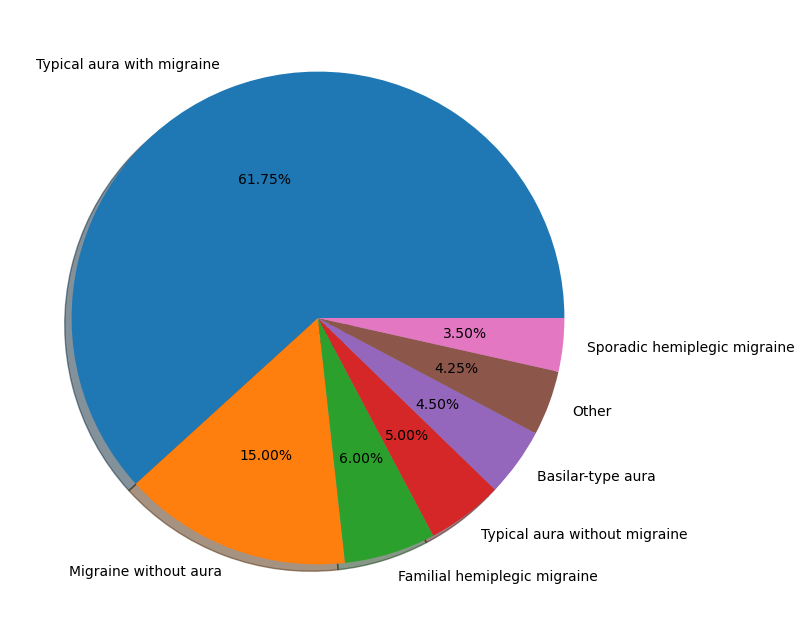

In [9]:
l1 = [247, 60,24, 20,18,17,14]
l2 = ['Typical aura with migraine', 'Migraine without aura', 'Familial hemiplegic migraine', 'Typical aura without migraine', 'Basilar-type aura', 'Other', 'Sporadic hemiplegic migraine']
plt.figure(figsize = (10,8))
plt.pie(l1, labels = l2, autopct = '%1.2f%%', shadow = True)
plt.show()

In [10]:
#Encoding the Type column

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataset['migraine_type'] = enc.fit_transform(dataset['Type'])
dataset['migraine_type'].value_counts()

5    247
2     60
1     24
6     20
0     18
3     17
4     14
Name: migraine_type, dtype: int64

In [11]:
#Removing the Type column

dataset.drop(columns = 'Type', axis = 1, inplace = True)
dataset.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,migraine_type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


In [12]:
#Removing the Duplicate data

dataset.drop_duplicates(inplace = True)
print('\nNow the shape of the dataset is: ', dataset.shape)
dataset.head()


Now the shape of the dataset is:  (394, 24)


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,migraine_type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


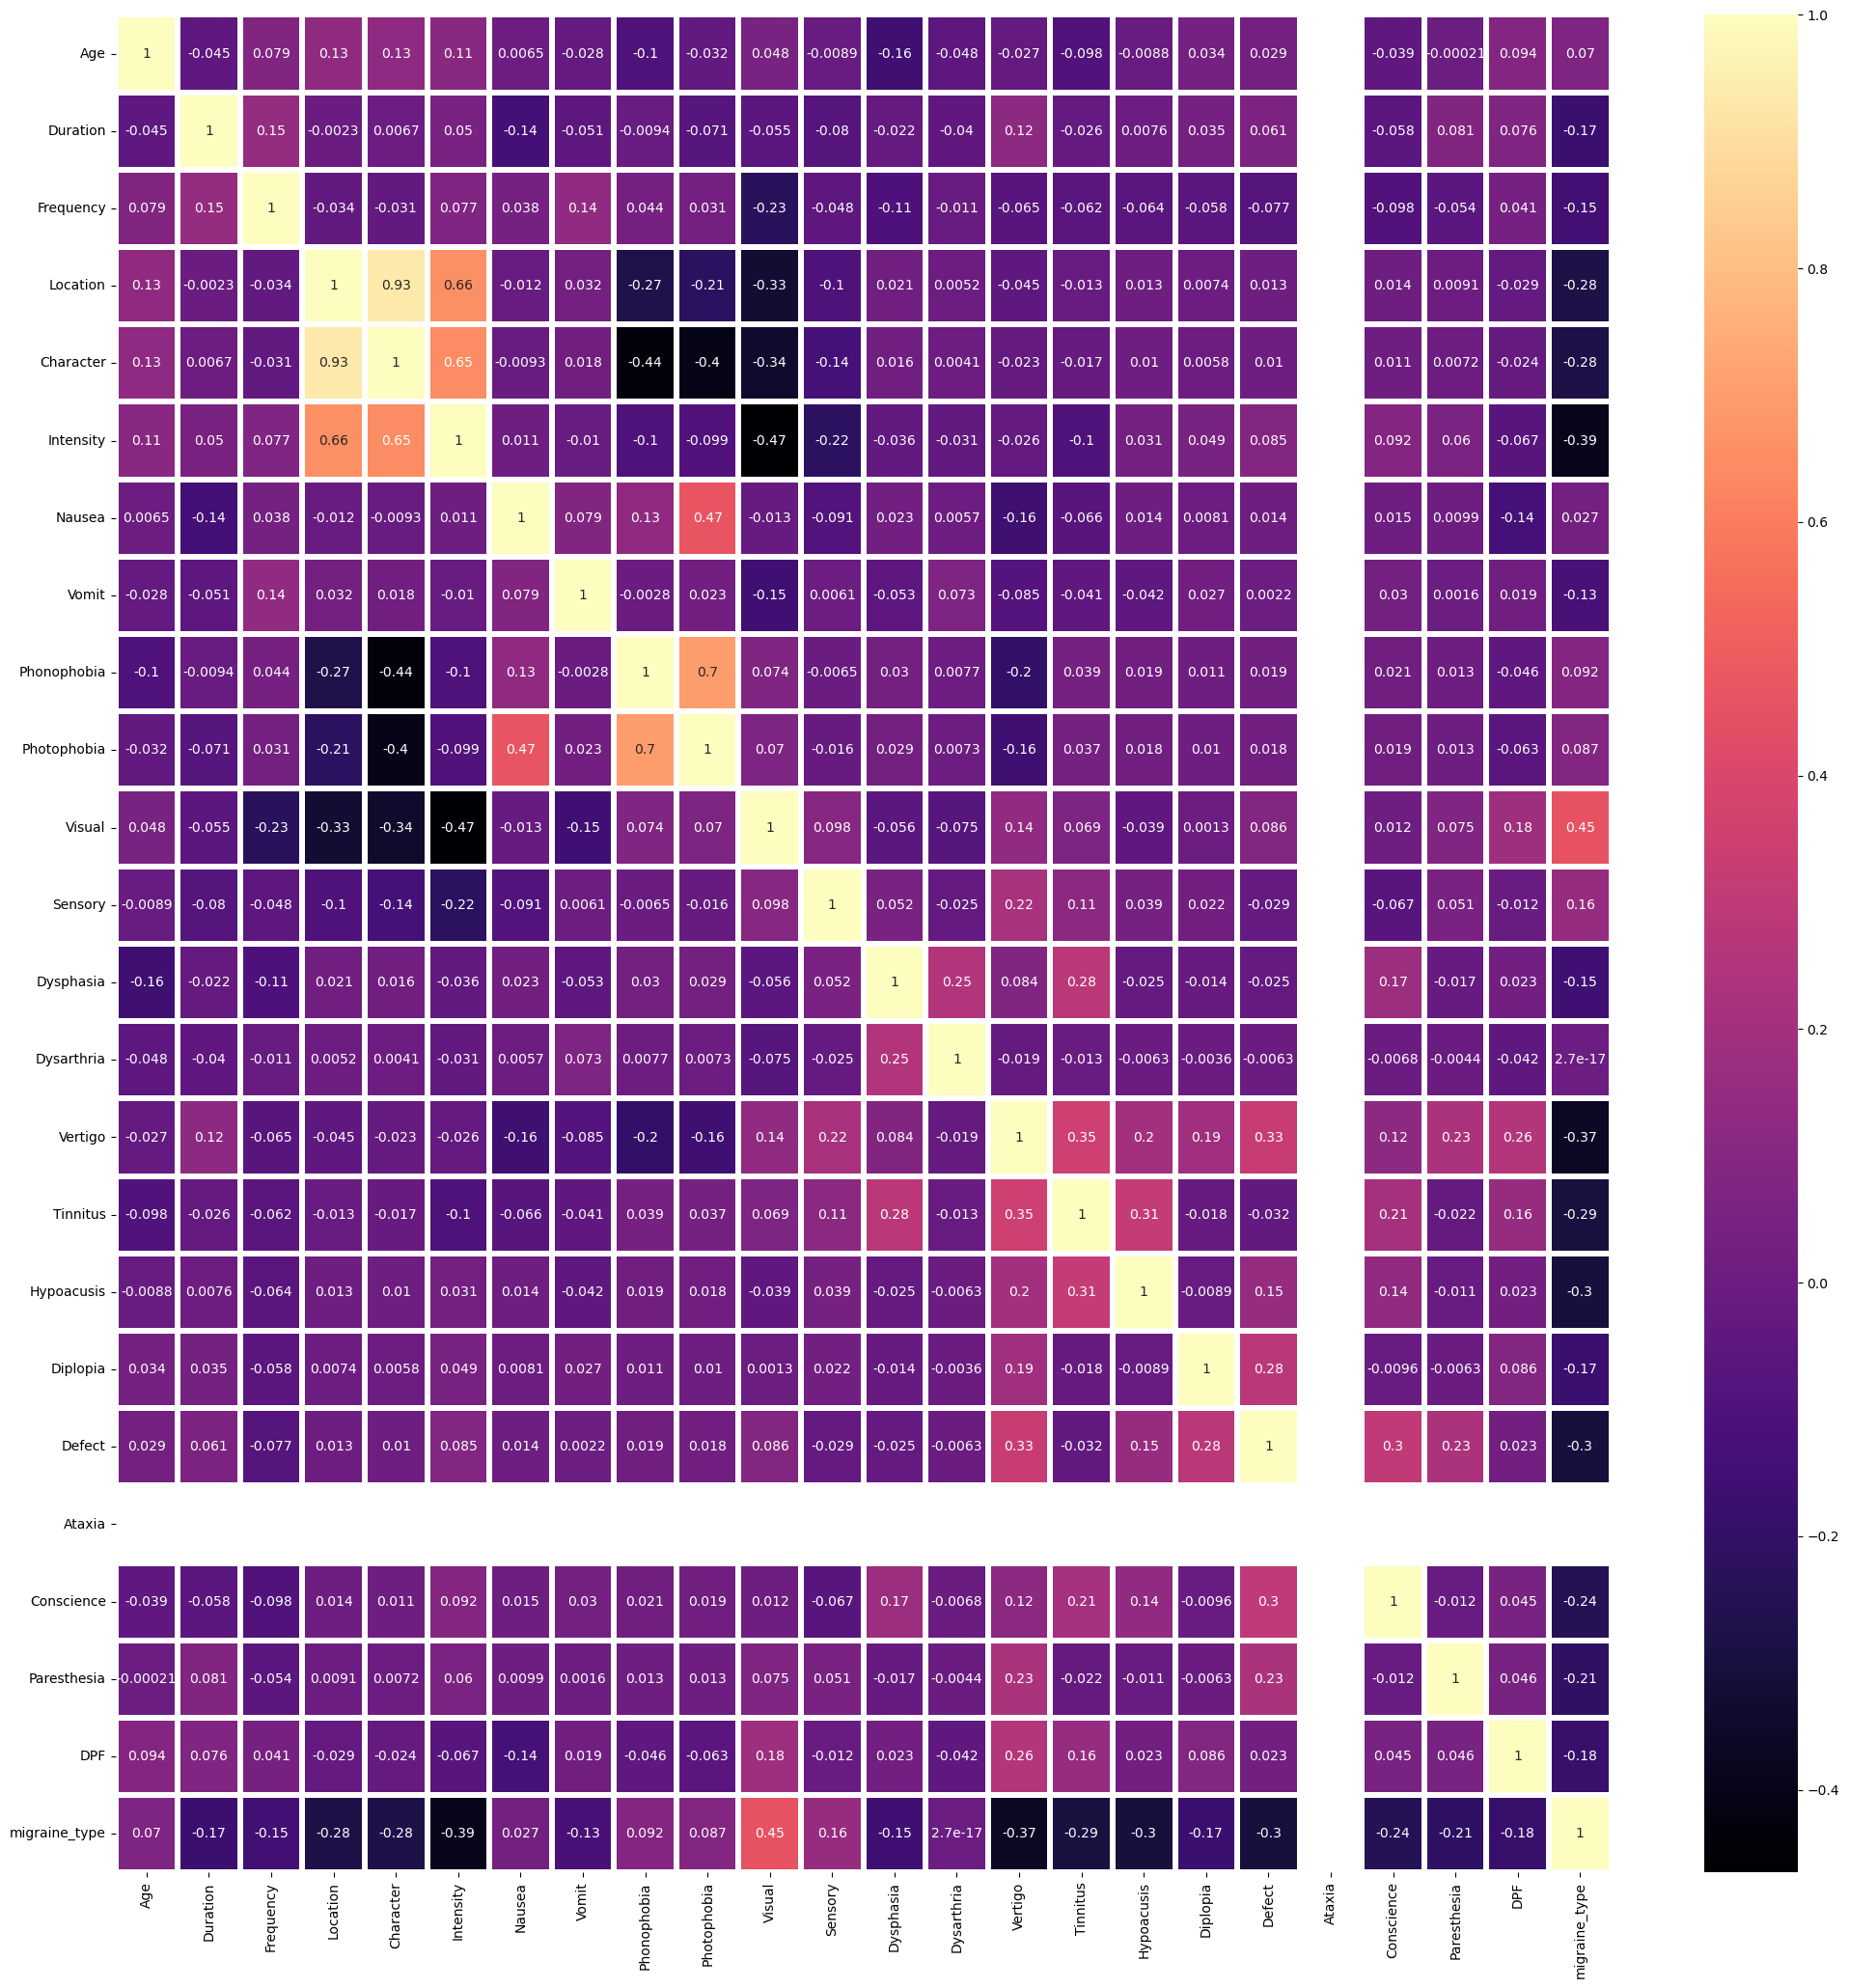

In [13]:
#Visualization of data by using Heatmap

plt.figure(figsize = (25, 25))
sns.heatmap(dataset.corr(), annot = True, linewidths=3,cmap = 'magma')
plt.show()

In [14]:
#Statistical summary of the data

print('\nDescription of the data: \n')
dataset.describe()


Description of the data: 



,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,migraine_type
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,394.0,394.000000,394.000000,394.000000,394.000000
mean,31.695431,1.619289,2.365482,0.972081,0.977157,2.472081,0.987310,0.324873,0.977157,0.979695,...,0.126904,0.060914,0.015228,0.005076,0.015228,0.0,0.017766,0.007614,0.408629,4.000000
std,12.182607,0.773106,1.672537,0.270203,0.279924,0.771953,0.112077,0.468923,0.149592,0.141219,...,0.333288,0.239476,0.122616,0.071156,0.122616,0.0,0.132270,0.087037,0.492206,1.659271
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000
75%,40.000000,2.000000,3.750000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,5.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,6.000000


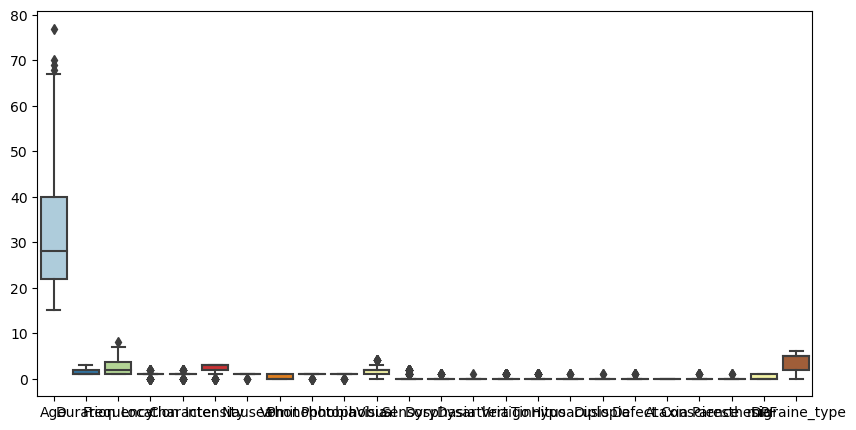

In [15]:
#Visualization of data by using Boxplot

plt.figure(figsize = (10, 5))
sns.boxplot(data = dataset, palette="Paired")
plt.show()

# Spliting the data

In [16]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['migraine_type'], axis = 1)
y = dataset['migraine_type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [17]:
#Dimension of x_train, x_test, y_train, y_test

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 23)
(40, 23)
(354,)
(40,)


### Standardization of the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_standarized = scaler.transform(x_train)
print(x_train_standarized.std())

0.9780192938436515


In [19]:
x_test_standarized = scaler.transform(x_test)
print(x_test_standarized.std())

1.3491694315508735


# Train the data into the different models

In [20]:
'''from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
model = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('\nAccuracy score through Random forest classifier: ', accuracy_score(y_test, y_pred))
print('\n\nConfusion matrix for Random forest classifier:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))'''

"from sklearn.ensemble import RandomForestClassifier\nimport scikitplot as skplt\nmodel = RandomForestClassifier(n_estimators = 50, criterion = 'gini')\nmodel.fit(x_train, y_train)\ny_pred = model.predict(x_test)\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nprint('\nAccuracy score through Random forest classifier: ', accuracy_score(y_test, y_pred))\nprint('\n\nConfusion matrix for Random forest classifier:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))"

In [21]:
'''from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('\nAccuracy score through Logistic regression: ', accuracy_score(y_test, y_pred))
print('\n\nConfusion matrix for Logistic Regression:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))''' 

"from sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\nmodel.fit(x_train, y_train)\ny_pred = model.predict(x_test)\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nprint('\nAccuracy score through Logistic regression: ', accuracy_score(y_test, y_pred))\nprint('\n\nConfusion matrix for Logistic Regression:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))"

In [22]:
'''from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score through Decision tree classifier: ',accuracy_score(y_test, y_pred))
print('\n\nConfusion matrix for Decision Tree classifier:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))'''

"from sklearn.tree import DecisionTreeClassifier\nmodel = DecisionTreeClassifier()\nmodel.fit(x_train, y_train)\ny_pred = model.predict(x_test)\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nprint('Accuracy score through Decision tree classifier: ',accuracy_score(y_test, y_pred))\nprint('\n\nConfusion matrix for Decision Tree classifier:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))"

Accuracy score through Naive bayes:  0.975


Confusion matrix for Naive bayes:
 AxesSubplot(0.125,0.11;0.62x0.77)


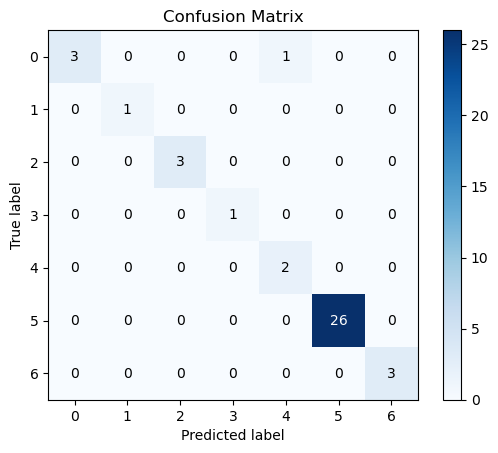

In [23]:
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
model = GaussianNB()
model.fit(x_train.values, y_train.values)
y_pred = model.predict(x_test.values)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score through Naive bayes: ',accuracy_score(y_test, y_pred))
print('\n\nConfusion matrix for Naive bayes:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred)) 

In [24]:
'''from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score through SVM: ',accuracy_score(y_test, y_pred))
print('\n\nConfusion matrix for SVM:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))'''

"from sklearn.svm import SVC\nmodel = SVC(kernel = 'linear', random_state = 0)\nmodel.fit(x_train, y_train)\ny_pred = model.predict(x_test)\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nprint('Accuracy score through SVM: ',accuracy_score(y_test, y_pred))\nprint('\n\nConfusion matrix for SVM:\n', skplt.metrics.plot_confusion_matrix(y_test, y_pred))"

In [25]:
import pickle
pickle.dump(model, open('migraine.pkl', 'wb'))

# Displaying the accuracy through Bar chart

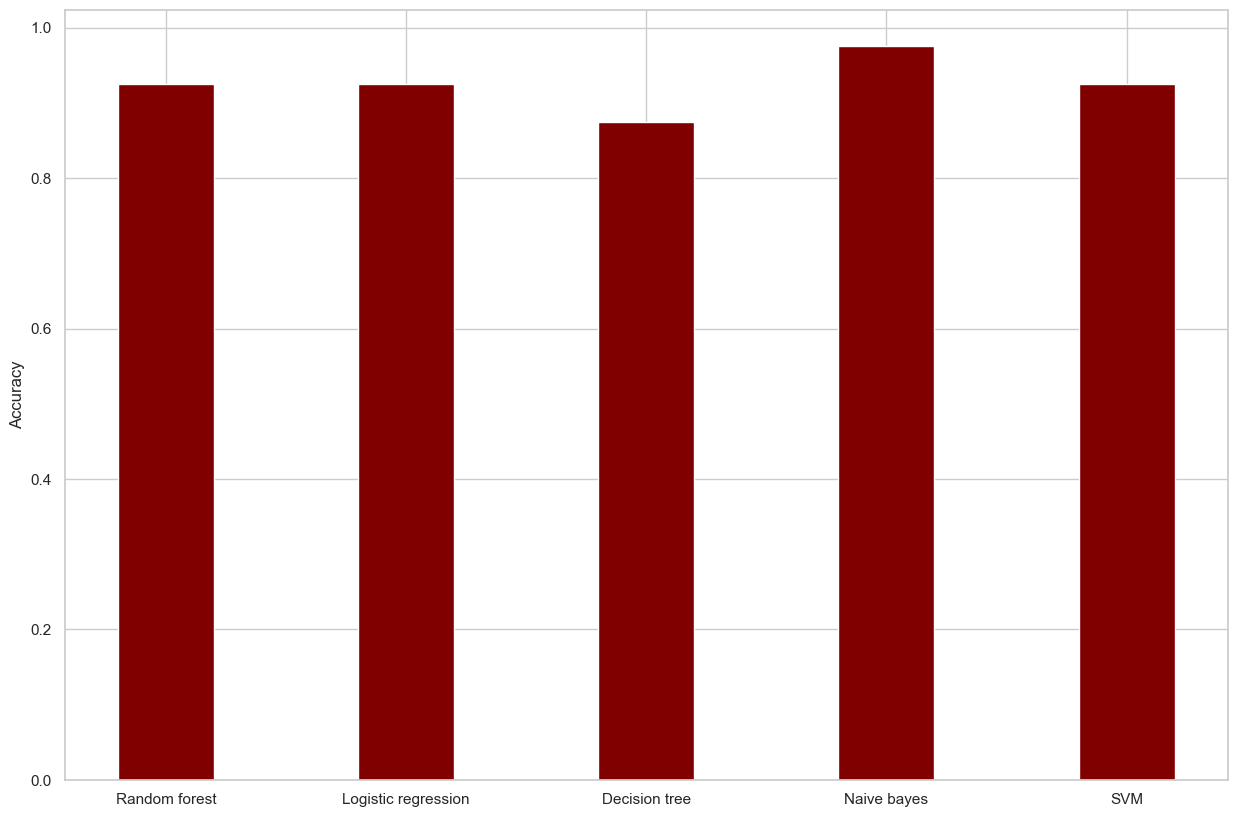

In [26]:
Models = ['Random forest', 'Logistic regression', 'Decision tree', 'Naive bayes', 'SVM']
Accuracy = [0.925, 0.925, 0.875, 0.975, 0.925]
ypos = np.arange(len(Models))
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (15, 10))
plt.xticks(ypos, Models)
plt.ylabel('Accuracy')
plt.bar(Models, Accuracy, width = 0.4, color = 'maroon',)
plt.show()

# Prediction by best accurate model

In [27]:
Input = [[20,3,1,1,1,3,1,0,1,1,3,1,0,0,1,0,0,0,0,0,0,1,1]]
pred = model.predict(Input)
pred

array([0])

In [28]:
if(pred == 0):
    print("Basilar Type Aura")
elif(pred == 1):
    print("Familial Hemiplegic Migraine")
elif(pred == 2):
    print("Migraine Without Aura")
elif(pred == 3):
    print("Other")
elif(pred == 4):
    print("Sporadic Hemiplegic Migraine")
elif(pred == 5):
    print("Typical Aura With Migraine")
elif(pred == 6):
    print("Typical Aura Without Migraine")

Basilar Type Aura
